In [1]:
'''
Date: 2022.07.18
Title: 트위터 API 데이터 분석하기
By: Kang Jin Seong
'''

''' 파이썬 API 사용하기'''
import tweepy

#발급 완료된 KEY를 입력합니다.
CONSUMER_KEY = "Z6VBBFaiuR8jjXXkm9TzKhGR1"
CONSUMER_SECRET = "xoMlggRp5AvfeEddbtZEd4mLFGQuoos7N4bDnQzG5epBhWPPwJ"
ACCESS_TOKEN_KEY = "1548939485354033152-jflzE4MM0LWMaANpz5b97HS5VeUwW2"
ACCESS_TOKEN_SECRET = "2DsY9Tg4hydFrUD6CJqiDXRDR9SqB7CG4TaRiL7629mTJ"

# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

#twitter API 를 사용하기 위한 준비입니다.
api = tweepy.API(auth)
# print(api)
# twitter API를 사용하여 '손흥민'이 포함된 트윗들을 크롤링한 뒤 , entities에서 'user_mentions', 'hashtags'를 추출합니다.
keyword = "손흥민"
tweets = api.search_tweets(q = keyword)
for tweet in tweets:
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
#     print(tweet.tetxt)


[]
[{'text': '손흥민', 'indices': [0, 4]}, {'text': 'sonny', 'indices': [5, 11]}]
[{'screen_name': 'H_hm7_', 'name': '𝑯', 'id': 1531223533183209472, 'id_str': '1531223533183209472', 'indices': [3, 10]}]
[{'text': '손흥민', 'indices': [35, 39]}, {'text': 'Sonny', 'indices': [40, 46]}]
[{'screen_name': 'sonny_cut', 'name': '쏘니컷🎬𝙎𝙤𝙣𝙣𝙮_𝙘𝙪𝙩', 'id': 418732818, 'id_str': '418732818', 'indices': [3, 13]}]
[]
[]
[]
[{'screen_name': 'denisekimchi', 'name': '호기심의 팔랑귀', 'id': 33442827, 'id_str': '33442827', 'indices': [3, 16]}]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[{'screen_name': 'H_hm7_', 'name': '𝑯', 'id': 1531223533183209472, 'id_str': '1531223533183209472', 'indices': [3, 10]}]
[{'text': '손흥민', 'indices': [35, 39]}, {'text': 'Sonny', 'indices': [40, 46]}]
[{'screen_name': 'denisekimchi', 'name': '호기심의 팔랑귀', 'id': 33442827, 'id_str': '33442827', 'indices': [3, 16]}]
[]
[{'screen_name': 'YouTube', 'name': 'YouTube', 'id': 10228272, 'id_str': '10228272', 'indices': [103, 111]}]
[]
[{'screen_name': '

In [2]:
'''API 데이터로 데이터 프레임 생성하기'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy

# #발급 완료된 KEY를 입력합니다.
# CONSUMER_KEY = "Z6VBBFaiuR8jjXXkm9TzKhGR1"
# CONSUMER_SECRET = "xoMlggRp5AvfeEddbtZEd4mLFGQuoos7N4bDnQzG5epBhWPPwJ"
# ACCESS_TOKEN_KEY = "1548939485354033152-jflzE4MM0LWMaANpz5b97HS5VeUwW2"
# ACCESS_TOKEN_SECRET = "2DsY9Tg4hydFrUD6CJqiDXRDR9SqB7CG4TaRiL7629mTJ"

# # 개인정보 인증을 요청하는 Handler입니다.
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# # 인증요청을 수행합니다.
# auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# #twitter API 를 사용하기 위한 준비입니다.
# api = tweepy.API(auth)
# keyword = "손흥민"
#크롤링된 데이터를 저장할 데이터 프레임입니다.
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns = columns)

#크롤링을 수행할 갯수를 입력하고, Cursor 객체를 사용하여 크롤링을 수행합니다.
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q = keyword).items(max_tweets)]

# '손흥민'이 포함된 1000개의 트윗들에서 'text', 'created_at' 정보를 데이터 프레임으로 저장합니다.

for tweet in searched_tweets:
    tweet_json = tweet._json
    tweet_text = tweet_json['text']
    created = tweet_json['created_at']
    row = [created, tweet_text]
    series = pd.Series(row, index = df.columns)
    df = df.append(series, ignore_index = True)

df.to_csv("tweet_temp.csv", index=False)


C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppDat

C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3837181249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)
C:\Users\USER\AppDat

In [3]:
'''텍스트 데이터 전처리하기'''
df = pd.read_csv("tweet_temp.csv")
df.head()

,created,tweet_text
0,Wed Jul 20 04:49:36 +0000 2022,#손흥민 #sonny\n\n너무 상큼 .. 앙큼 (?) .. 잘 어울리쟈나 🥹💛 h...
1,Wed Jul 20 04:47:18 +0000 2022,RT @H_hm7_: [HQ] 220713 토트넘 vs K리그\n#손흥민 #Sonn...
2,Wed Jul 20 04:43:32 +0000 2022,"RT @sonny_cut: 다음달, 손흥민 EPL 득점왕 기념메달 출시 https:..."
3,Wed Jul 20 04:42:49 +0000 2022,세상 소양면급만남 손흥민 홍성페이만남 청주청원24시출장
4,Wed Jul 20 04:42:40 +0000 2022,RT @denisekimchi: 팀원들이랑 변호사 선생님들이랑 한식당 감. 갠적으로...


In [4]:
'''텍스트 데이터 전처리하기'''
import re

#텍스트 정제 함수: 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

# tweet_text 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,Wed Jul 20 04:49:36 +0000 2022,#손흥민 #sonny\n\n너무 상큼 .. 앙큼 (?) .. 잘 어울리쟈나 🥹💛 h...,손흥민 너무 상큼 앙큼 잘 어울리쟈나
1,Wed Jul 20 04:47:18 +0000 2022,RT @H_hm7_: [HQ] 220713 토트넘 vs K리그\n#손흥민 #Sonn...,토트넘 리그손흥민 경기 끝나고 규성선수랑 인사
2,Wed Jul 20 04:43:32 +0000 2022,"RT @sonny_cut: 다음달, 손흥민 EPL 득점왕 기념메달 출시 https:...",다음달 손흥민 득점왕 기념메달 출시
3,Wed Jul 20 04:42:49 +0000 2022,세상 소양면급만남 손흥민 홍성페이만남 청주청원24시출장,세상 소양면급만남 손흥민 홍성페이만남 청주청원시출장
4,Wed Jul 20 04:42:40 +0000 2022,RT @denisekimchi: 팀원들이랑 변호사 선생님들이랑 한식당 감. 갠적으로...,팀원들이랑 변호사 선생님들이랑 한식당 감 갠적으로 비한국인들과 한식당 가는거 별...


In [5]:
'''konlpy를 이용한 키워드 추출하기'''
from konlpy.tag import Okt
from collections import Counter

#한국어 약식 불용어 사전 예시 파일입니다.
korean_stopwords_path = "C:/Users/USER/DataAnalysis_jupyter/korean_stopwords.txt"

#텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding = 'utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    #한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    #불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

# ko_text 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(1000, 4)


,created,tweet_text,ko_text,nouns
0,Wed Jul 20 04:49:36 +0000 2022,#손흥민 #sonny\n\n너무 상큼 .. 앙큼 (?) .. 잘 어울리쟈나 🥹💛 h...,손흥민 너무 상큼 앙큼 잘 어울리쟈나,"[손흥민, 상큼]"
1,Wed Jul 20 04:47:18 +0000 2022,RT @H_hm7_: [HQ] 220713 토트넘 vs K리그\n#손흥민 #Sonn...,토트넘 리그손흥민 경기 끝나고 규성선수랑 인사,"[토트넘, 리그, 손흥민, 경기, 선수, 인사]"
2,Wed Jul 20 04:43:32 +0000 2022,"RT @sonny_cut: 다음달, 손흥민 EPL 득점왕 기념메달 출시 https:...",다음달 손흥민 득점왕 기념메달 출시,"[손흥민, 득점, 기념, 메달, 출시]"
3,Wed Jul 20 04:42:49 +0000 2022,세상 소양면급만남 손흥민 홍성페이만남 청주청원24시출장,세상 소양면급만남 손흥민 홍성페이만남 청주청원시출장,"[세상, 소양면, 만남, 손흥민, 홍성, 페이, 만남, 청주, 청원시, 출장]"
4,Wed Jul 20 04:42:40 +0000 2022,RT @denisekimchi: 팀원들이랑 변호사 선생님들이랑 한식당 감. 갠적으로...,팀원들이랑 변호사 선생님들이랑 한식당 감 갠적으로 비한국인들과 한식당 가는거 별...,"[팀원, 변호사, 선생님, 한식당, 한국인, 한식당, 별로, 음식, 설명, 음식, ..."


In [6]:
'''분석 연관분석을 이용한 키워드 분석하기'''
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성합니다.
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민','케인','포체티노']
]

#연관 분석을 수행합니다.
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '시소코'}), confidence=0.3333333333333333, lift=1.0), Or

In [7]:
# 분석 결과와 관련된 파라미터를 설정하는 방법
# 지지도 0.5, 신뢰도 0.6 향상도 1.0 이상이면서 (손흥민, 케인) 처럼 규칙의 크기가 2이하인 규칙을 추출합니다.
# list(apriori(transactions,
#             min_support = 0.5,
#             min_confidence = 0.6,
#             min_lift = 1.0,
#             max_length = 2))

In [8]:
# 트위터 연관 키워드 분석
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
# print(transactions)

In [9]:
# 연관 분석을 수행합니다.
result = list(apriori(transactions,
                     min_support = 0.05,
                     min_confidence = 0.1,
                     min_lift = 5,
                     max_length = 2))

In [10]:
#데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

#규칙의 조건절을 source, 결과절을 target, 지지도를 support라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row  = [items[0], items[1], result.support]
        series = pd.Series(row, index = network_df.columns)
        network_df = network_df.append(series, ignore_index = True)
        
network_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_9708\940493648.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\940493648.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\940493648.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9708\940493648.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network

,source,target,support
0,손흥민,시소코,0.333333
1,케인,손흥민,0.666667
2,포체티노,손흥민,0.333333
3,케인,포체티노,0.333333


In [11]:
'''키워드 빈도 추출하기'''
tweet_corpus = ''.join(df['ko_text'].tolist())

from konlpy.tag import Okt
from collections import Counter

#명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
# print(remove_char_counter)

# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.

node_df.head()

,node,nodesize
0,손흥민,1127
2,토트넘,485
3,리그,93
4,경기,51
5,선수,51


24


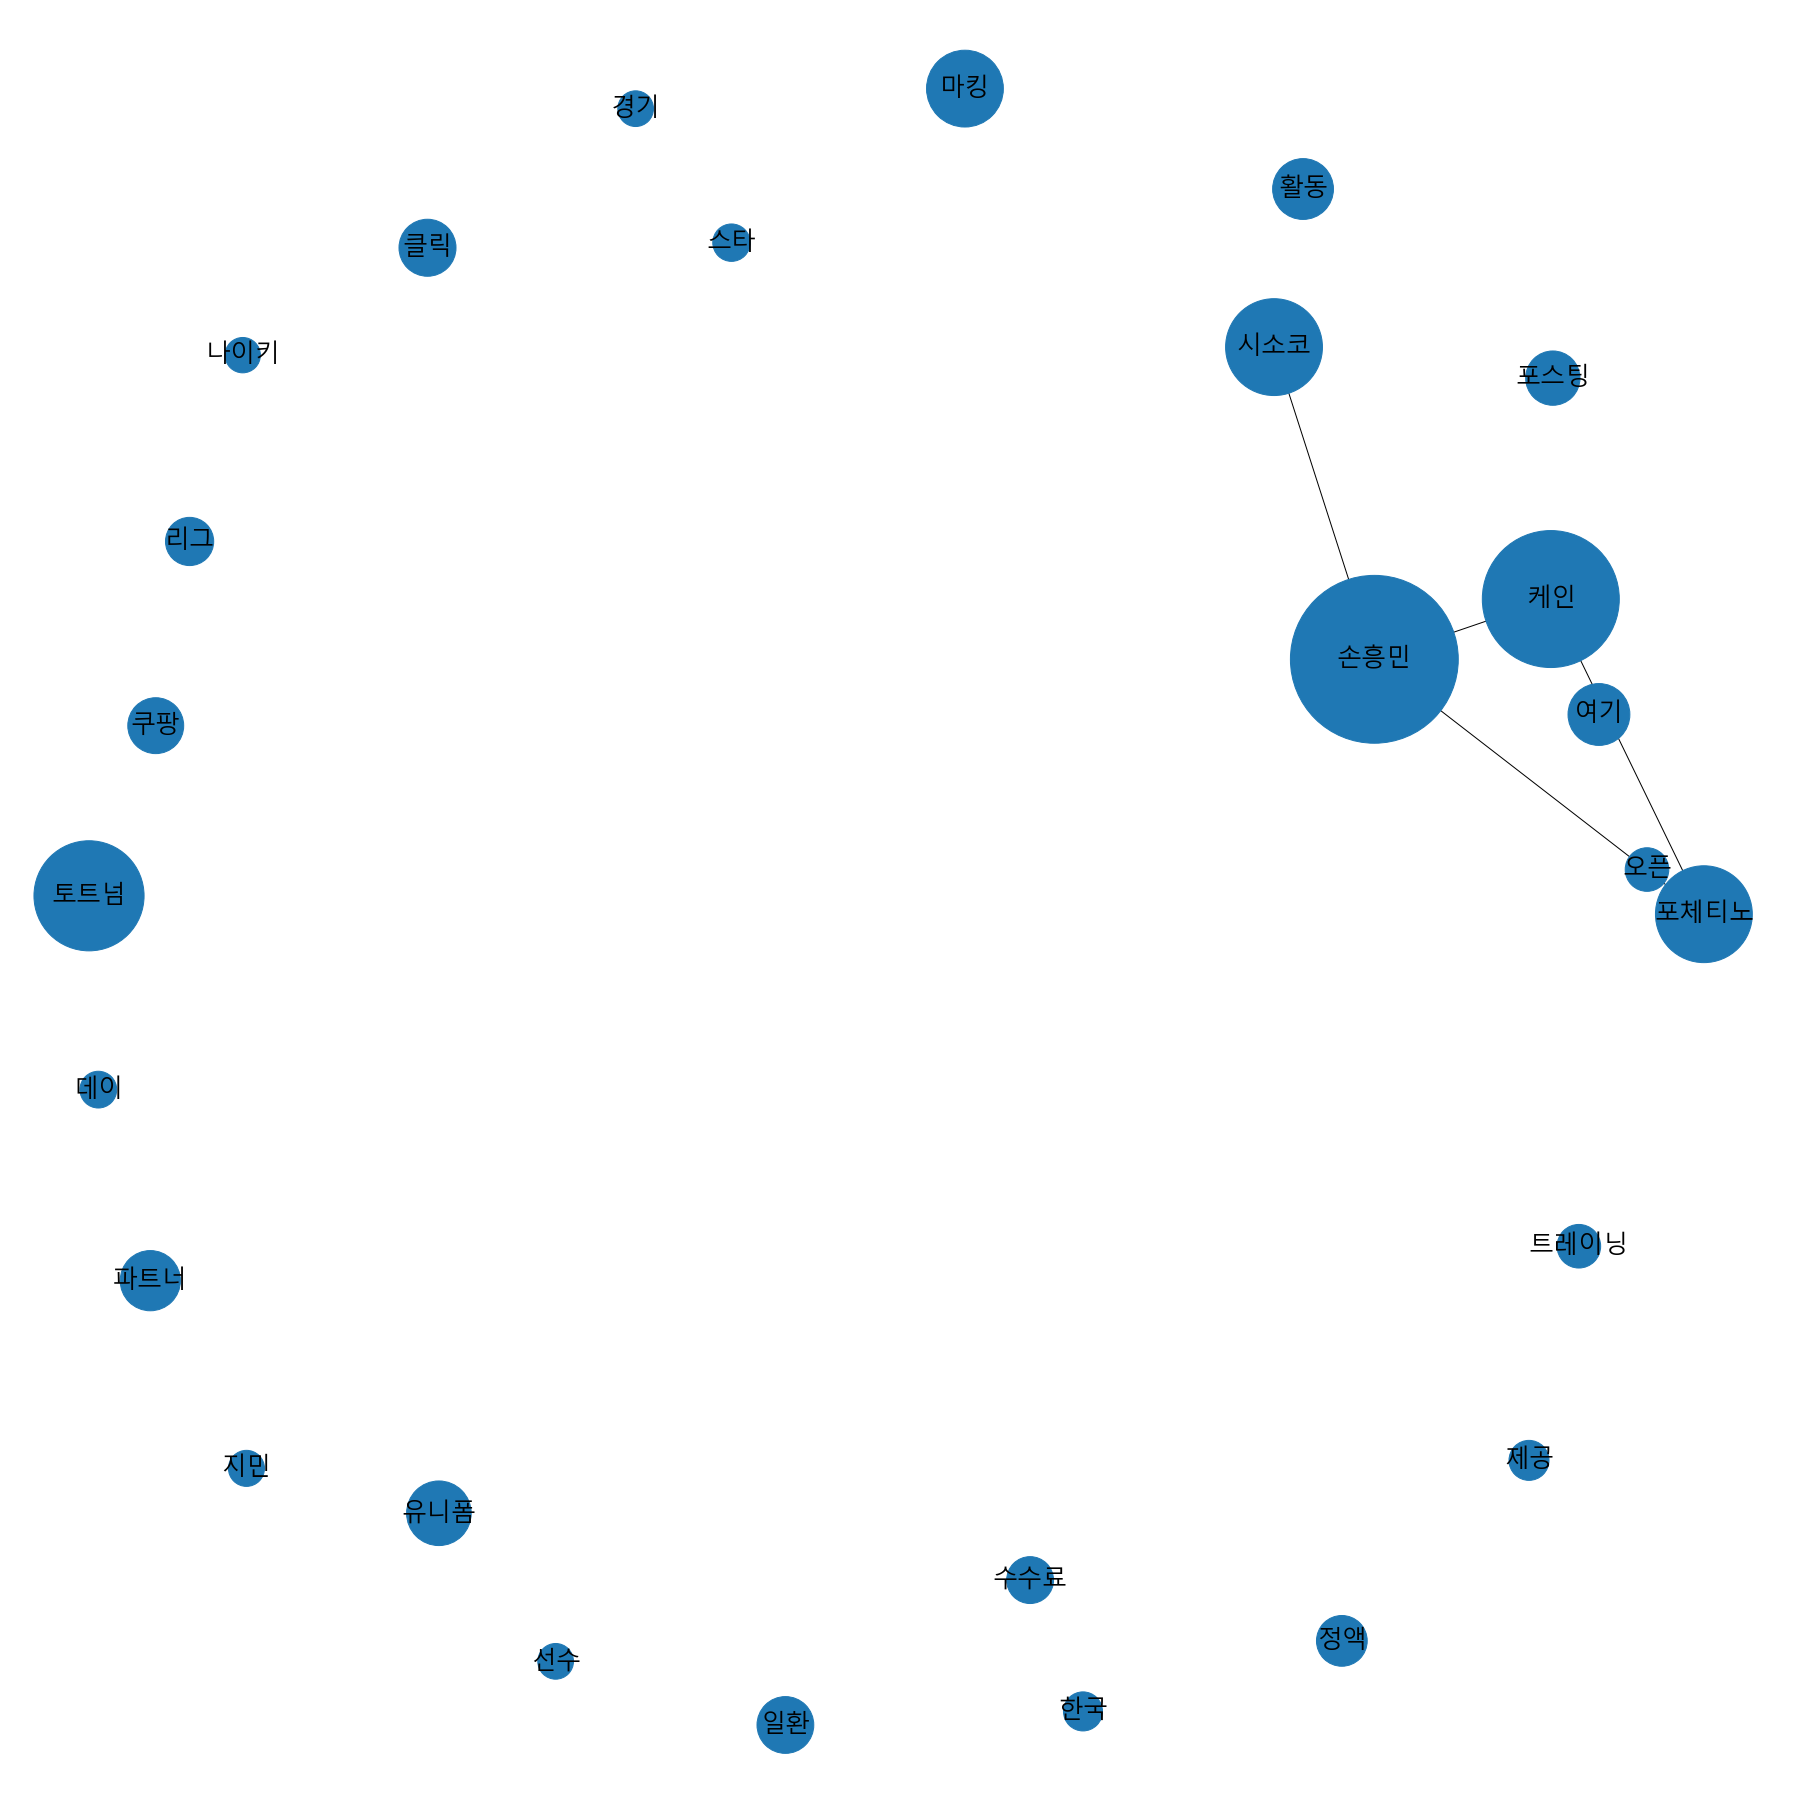

In [38]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_nodes_from([(row['node'],{'nodesize': row['nodesize']})])
#     print(row['node'])
#     print(row['nodesize'])
print(len(G.nodes.data()))
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
#     print(row['source'])
#     print(row['target'])
#     print(row['support'])
# # 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = []
for index, row in node_df.iterrows():
    G.nodes[row['node']]['nodesize'] = row['nodesize'] * 25
    sizes.append(row['nodesize']* 25)
sizes.append(1127*25*0.333)
sizes.append(1127*25*0.666)
sizes.append(1127*25*0.333)

    
# print(G.nodes.data())
# print(len(G.nodes))

# print(len(sizes))

# sizes = [G.nodes[node]['nodesize']*25 for node in G]
# nx.draw(G, pos=pos, node_size=a)
nx.draw(G, pos=pos, node_size = sizes)
# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()